# LAB | Central Limit Theorem and Normality Tests


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [2]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

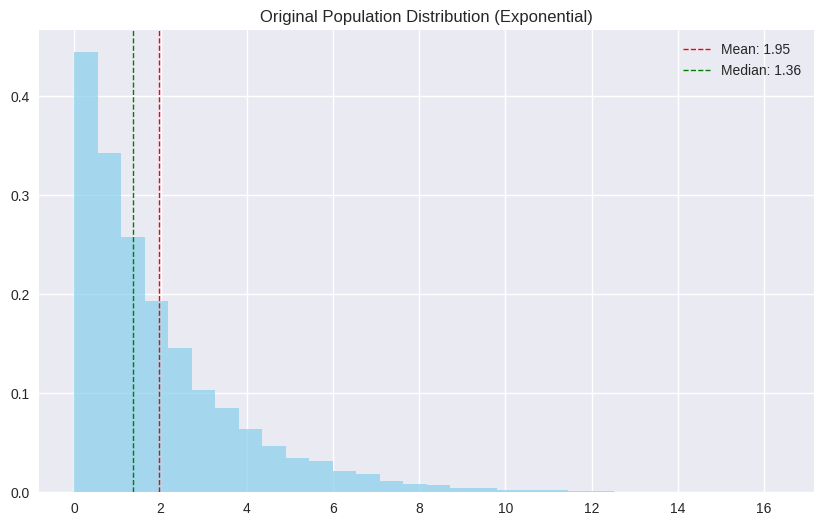

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
Skewness: 1.9190
Kurtosis: 5.1151



In [3]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

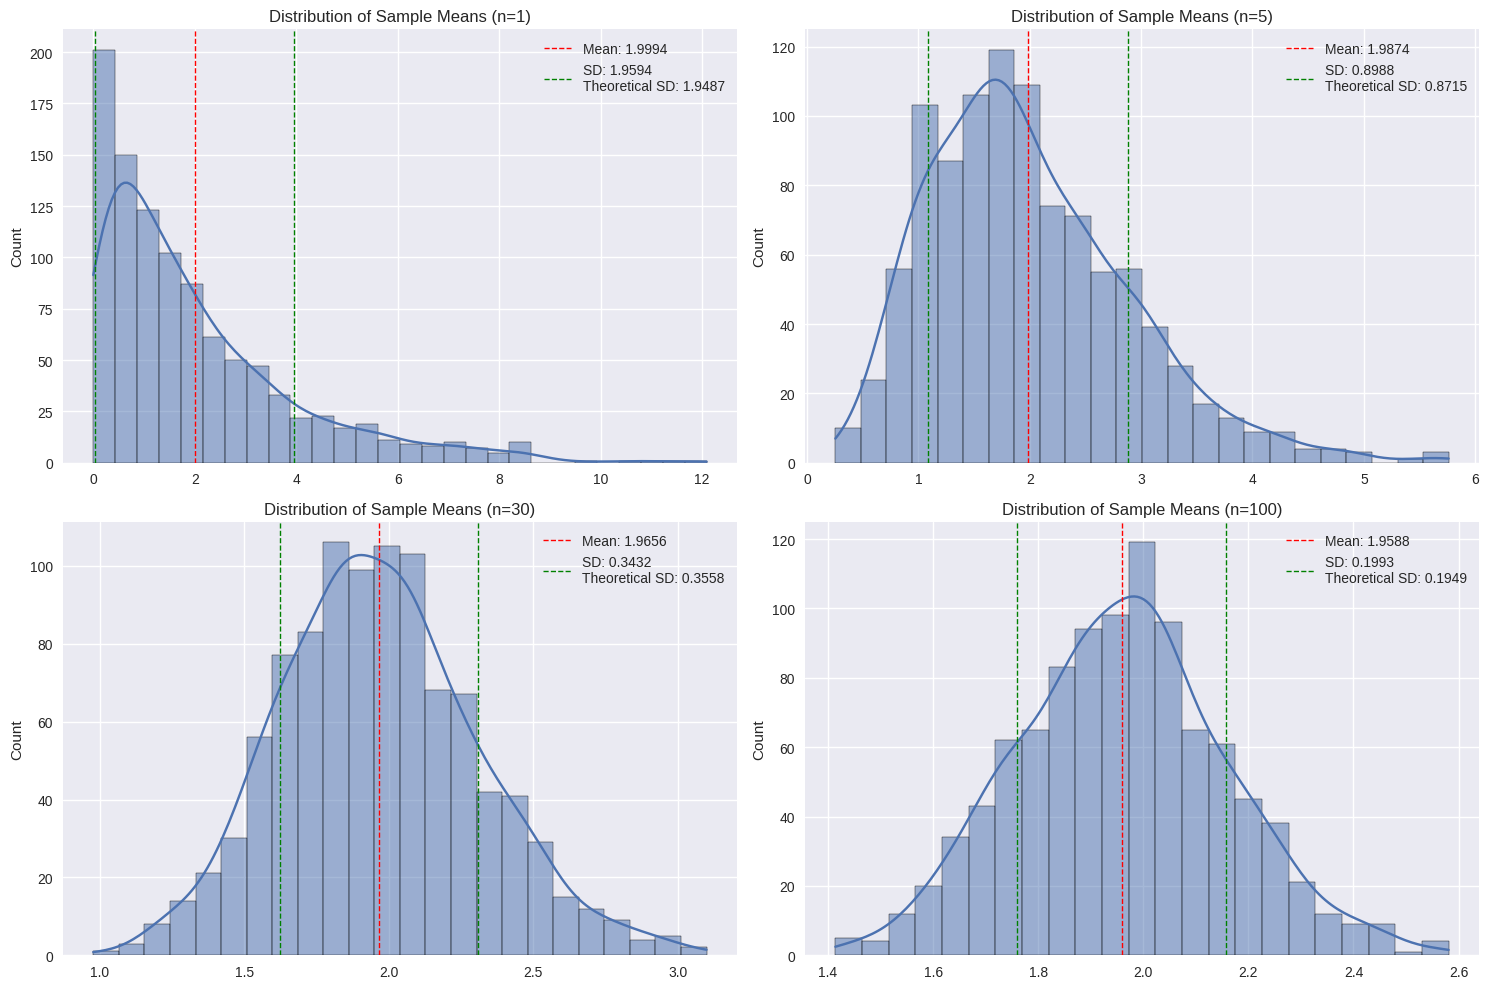

In [4]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])

    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])

    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)

    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)

    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1,
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

In [ ]:
# TODO
# Your code here
# 1. the distribution of sample means become more normally distributed as sample size increases.
# 2. The observed standard deviation of sample means gets very close to the theoretical value, especially for bigger sample sizes.
# 3. the theoretical SD formula according to CLT is the standard error. It expplains how much variation we can expect in sample means due to sampling randomness.
# 4. If the sample sizes increase, the skewness decreases and the distribution becomes more symetric.

## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [5]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


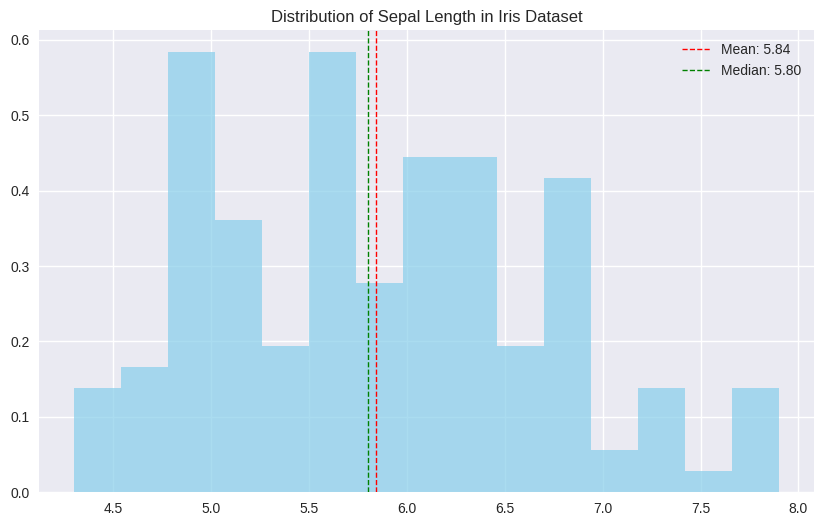

In [7]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

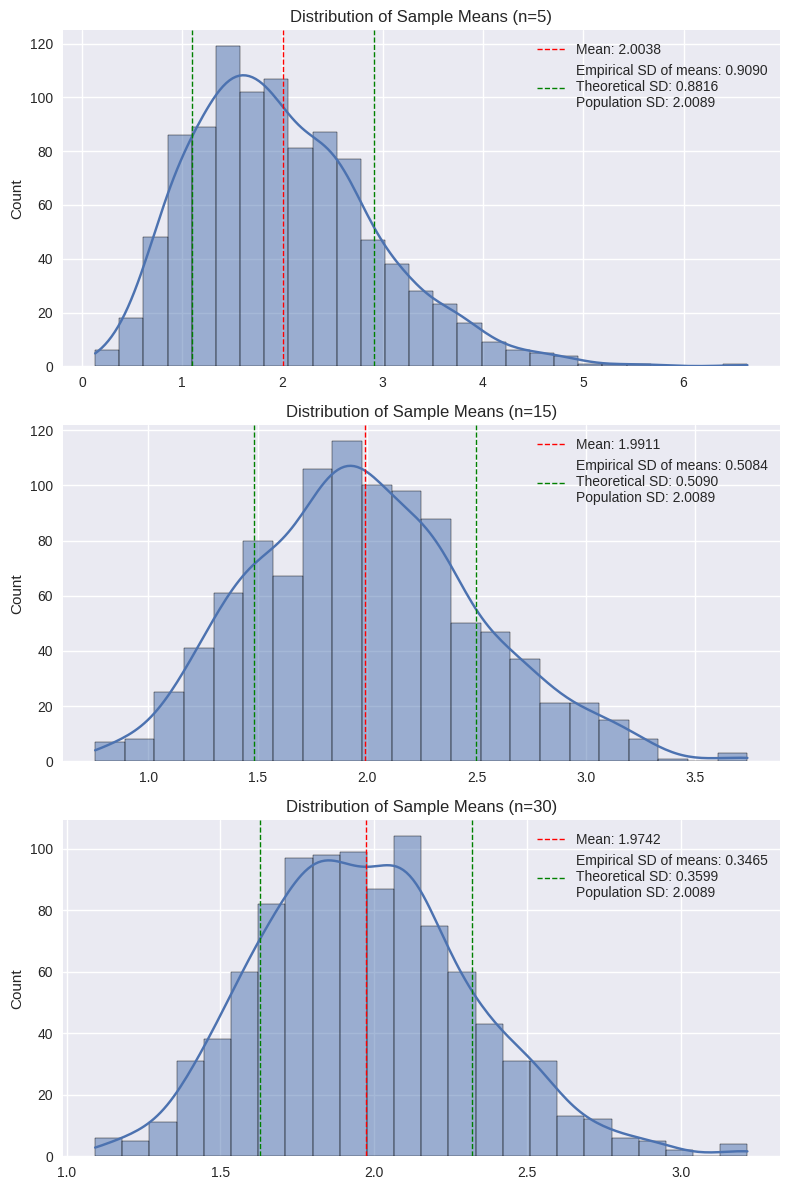

test statistic: 0.8207
p-value: 0.0000
❌ No normal distribution of data.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
# TODO
# Set parameters
population_size = 10000
sample_sizes = [5, 15, 30]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size
population_std = np.std(population)

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)


# Show how sample means approach normal distribution
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])

    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])

    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)

    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)

    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1,
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'Empirical SD of means: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}\nPopulation SD: {population_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Shapiro-Wilk-Test
stat, p_value = shapiro(population)

print(f"test statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("✅ Data is probably normally distributed.")
else:
    print("❌ No normal distribution of data.")



## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [29]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Lade den Boston Housing Datensatz über OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)

# In DataFrame umwandeln
boston_df = boston.frame

# Zeige die ersten Zeilen
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [32]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

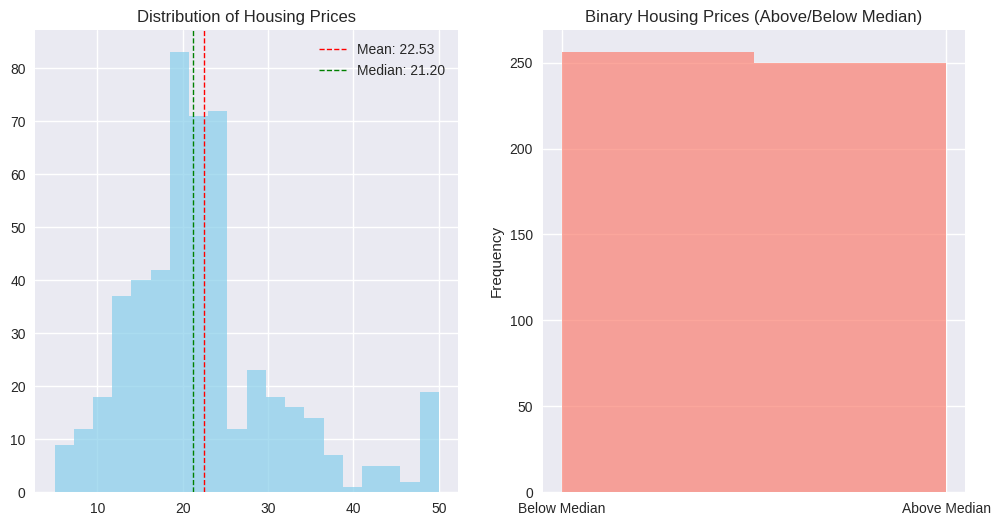

In [33]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:
   a) Sample means
   b) Sample medians
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


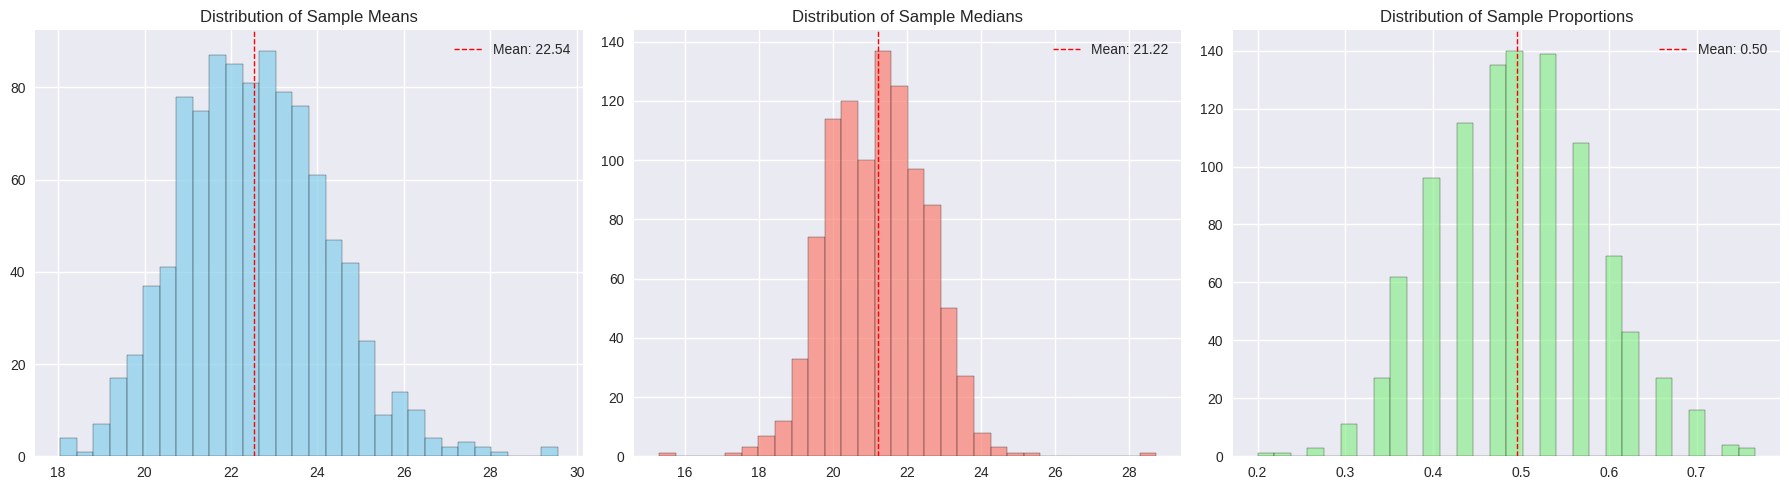

Mean of Sample Means: 22.54, Standard Deviation: 1.68
Mean of Sample Medians: 21.22, Standard Deviation: 1.30
Mean of Sample Proportions: 0.50, Standard Deviation: 0.09

Are all three distributions equally suited for showing the distribution?
The sample mean follows the Central Limit Theorem well and approaches a normal distribution as sample size increases.
The sample median is more resistant to outliers, but its distribution may not be as normal, especially for smaller sample sizes.
The distribution of sample proportions shows a clear normal distribution when sample size is sufficiently large, making it well-suited for displaying the distribution.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel: Falls boston_df nicht geladen ist
# boston_df = pd.read_csv('Pfad/zur/deiner/csv/Datei.csv')

# Medianwert des Preises (target)
median_price = boston_df['MEDV'].median()

# Stichprobengröße und Anzahl der Stichproben
sample_size = 30
n_samples = 1000

# Platz für die drei Statistiken
sample_means = []
sample_medians = []
sample_proportions = []

# Ziehe n_samples Zufallsstichproben und berechne die Statistiken
for _ in range(n_samples):
    sample = boston_df.sample(n=sample_size)

    # a) Sample mean
    sample_means.append(sample['MEDV'].mean())

    # b) Sample median
    sample_medians.append(sample['MEDV'].median())

    # c) Sample proportion (Häuser über dem Medianpreis)
    proportion_above_median = (sample['MEDV'] > median_price).mean()
    sample_proportions.append(proportion_above_median)

# Plotten der Histogramme
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# a) Histogramm der Sample Means
axes[0].hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title("Distribution of Sample Means")
axes[0].axvline(np.mean(sample_means), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_means):.2f}')
axes[0].legend()

# b) Histogramm der Sample Medians
axes[1].hist(sample_medians, bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title("Distribution of Sample Medians")
axes[1].axvline(np.mean(sample_medians), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_medians):.2f}')
axes[1].legend()

# c) Histogramm der Sample Proportions
axes[2].hist(sample_proportions, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title("Distribution of Sample Proportions")
axes[2].axvline(np.mean(sample_proportions), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sample_proportions):.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

# Ausgabe der Mittelwerte und Standardabweichungen der drei Statistiken
print(f"Mean of Sample Means: {np.mean(sample_means):.2f}, Standard Deviation: {np.std(sample_means):.2f}")
print(f"Mean of Sample Medians: {np.mean(sample_medians):.2f}, Standard Deviation: {np.std(sample_medians):.2f}")
print(f"Mean of Sample Proportions: {np.mean(sample_proportions):.2f}, Standard Deviation: {np.std(sample_proportions):.2f}")

print("\nAre all three distributions equally suited for showing the distribution?")
print("The sample mean follows the Central Limit Theorem well and approaches a normal distribution as sample size increases.")
print("The sample median is more resistant to outliers, but its distribution may not be as normal, especially for smaller sample sizes.")
print("The distribution of sample proportions shows a clear normal distribution when sample size is sufficiently large, making it well-suited for displaying the distribution.")


## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [45]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

Preview of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())


Summary statistics for median income:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [47]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


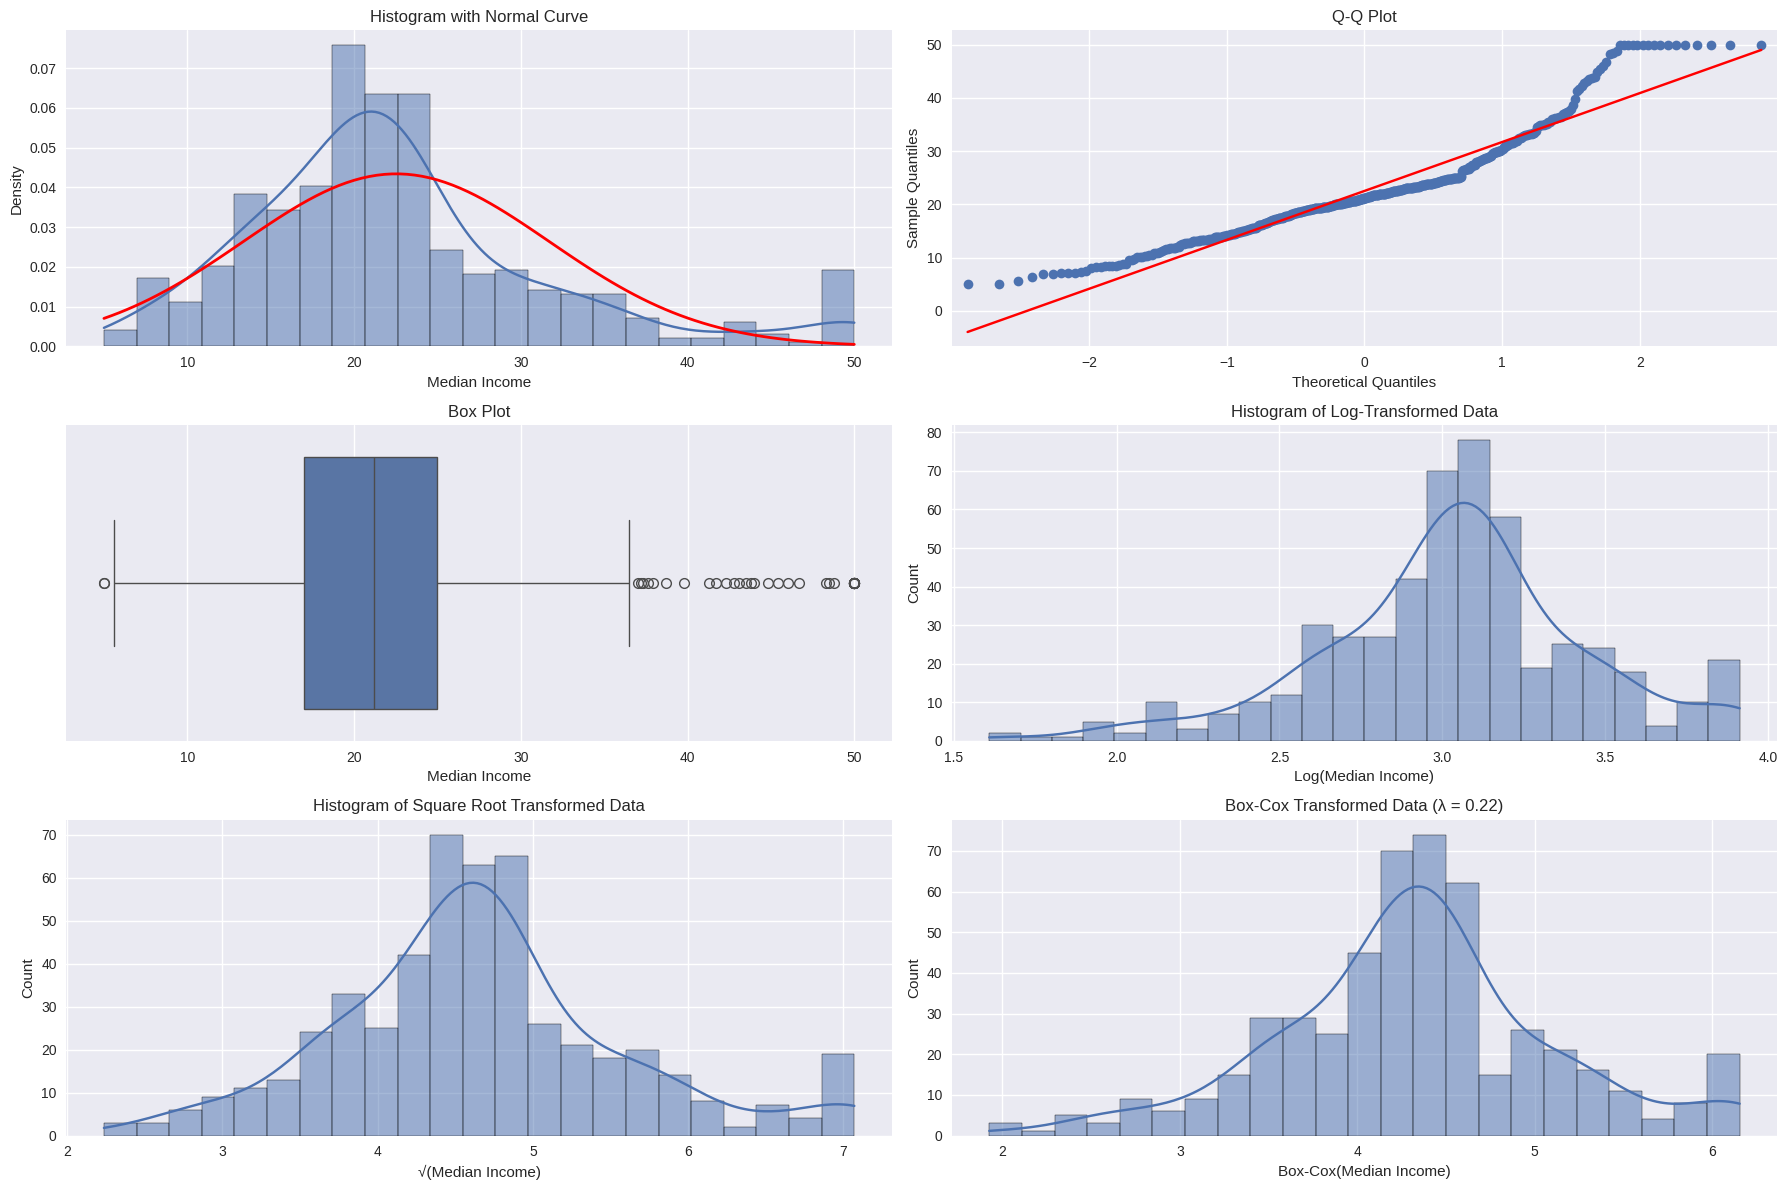

In [51]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, median_income ist bereits definiert (z.B. boston_df['MEDV'])
# Entferne 0 oder negative Werte für Transformationen, die dies benötigen
median_income = boston_df['MEDV']
median_income_pos = median_income[median_income > 0]

plt.figure(figsize=(18, 12))

# 1. Histogram with normal curve
plt.subplot(3, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# 2. Q-Q plot
plt.subplot(3, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# 3. Box plot
plt.subplot(3, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# 4. Log-transformed histogram
plt.subplot(3, 2, 4)
sns.histplot(np.log(median_income_pos), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

# 5. Square root transformation
plt.subplot(3, 2, 5)
sns.histplot(np.sqrt(median_income_pos), kde=True)
plt.title('Histogram of Square Root Transformed Data')
plt.xlabel('√(Median Income)')

# 6. Box-Cox transformation
plt.subplot(3, 2, 6)
boxcox_data, fitted_lambda = stats.boxcox(median_income_pos)
sns.histplot(boxcox_data, kde=True)
plt.title(f'Box-Cox Transformed Data (λ = {fitted_lambda:.2f})')
plt.xlabel('Box-Cox(Median Income)')

plt.tight_layout()
plt.show()


Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

In [ ]:
# Your code here - additional normality visualizations and transformations
# 1. all plots suggest that the data is normally distributed.
# 3. The transformation of the data helps to make it more normally. Especially the log transformation helped to reveal the normality of the data as data is right-skewed.
# 5. Having normally distributed data is important in statistical analysis because many parametric methods rely on this assumption. Applying these methods to non-normally distributed data can lead to inaccurate or misleading results.
